<i><b>Public AI</b></i>
<br>


# Numpy을 활용하여 머신러닝 - K-Means 군집화

### _Objective_

*  **K-Means 알고리즘 개괄** : 대표적인 군집화 방법론 중 하나인 K-Means 알고리즘을 이해합니다.<br>
*  **K-Means 알고리즘 구현** : K-Means 알고리즘을 Numpy로 구현해봅니다. <br>




In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# \[ 1. K-Means 알고리즘 개괄 \]

K-Means 알고리즘은 주어진 데이터를 K개의 클러스터로 묶는 '군집화 알고리즘' 중 하나로, 각 클러스터의 중심과 각 데이터 간의 거리 차이의 분산을 최소화하는 방식으로 데이터가 속할 군집을 묶어나갑니다.

우선 예제 데이터를 준비합시다. 

예제 데이터를 시각화해봅시다. 

In [3]:
dataset = np.array([[ 1.658985,  4.285136],
       [-3.453687,  3.424321],
       [ 4.838138, -1.151539],
       [-5.379713, -3.362104],
       [ 0.972564,  2.924086],
       [-3.567919,  1.531611],
       [ 0.450614, -3.302219],
       [-3.487105, -1.724432],
       [ 2.668759,  1.594842],
       [-3.156485,  3.191137],
       [ 3.165506, -3.999838],
       [-2.786837, -3.099354],
       [ 4.208187,  2.984927],
       [-2.123337,  2.943366],
       [ 0.704199, -0.479481],
       [-0.39237 , -3.963704],
       [ 2.831667,  1.574018],
       [-0.790153,  3.343144],
       [ 2.943496, -3.357075],
       [-3.195883, -2.283926],
       [ 2.336445,  2.875106],
       [-1.786345,  2.554248],
       [ 2.190101, -1.90602 ],
       [-3.403367, -2.778288],
       [ 1.778124,  3.880832],
       [-1.688346,  2.230267],
       [ 2.592976, -2.054368],
       [-4.007257, -3.207066],
       [ 2.257734,  3.387564],
       [-2.679011,  0.785119],
       [ 0.939512, -4.023563],
       [-3.674424, -2.261084],
       [ 2.046259,  2.735279],
       [-3.18947 ,  1.780269],
       [ 4.372646, -0.822248],
       [-2.579316, -3.497576],
       [ 1.889034,  5.1904  ],
       [-0.798747,  2.185588],
       [ 2.83652 , -2.658556],
       [-3.837877, -3.253815],
       [ 2.096701,  3.886007],
       [-2.709034,  2.923887],
       [ 3.367037, -3.184789],
       [-2.121479, -4.232586],
       [ 2.329546,  3.179764],
       [-3.284816,  3.273099],
       [ 3.091414, -3.815232],
       [-3.762093, -2.432191],
       [ 3.542056,  2.778832],
       [-1.736822,  4.241041],
       [ 2.127073, -2.98368 ],
       [-4.323818, -3.938116],
       [ 3.792121,  5.135768],
       [-4.786473,  3.358547],
       [ 2.624081, -3.260715],
       [-4.009299, -2.978115],
       [ 2.493525,  1.96371 ],
       [-2.513661,  2.642162],
       [ 1.864375, -3.176309],
       [-3.171184, -3.572452],
       [ 2.89422 ,  2.489128],
       [-2.562539,  2.884438],
       [ 3.491078, -3.947487],
       [-2.565729, -2.012114],
       [ 3.332948,  3.983102],
       [-1.616805,  3.573188],
       [ 2.280615, -2.559444],
       [-2.651229, -3.103198],
       [ 2.321395,  3.154987],
       [-1.685703,  2.939697],
       [ 3.031012, -3.620252],
       [-4.599622, -2.185829],
       [ 4.196223,  1.126677],
       [-2.133863,  3.093686],
       [ 4.668892, -2.562705],
       [-2.793241, -2.149706],
       [ 2.884105,  3.043438],
       [-2.967647,  2.848696],
       [ 4.479332, -1.764772],
       [-4.905566, -2.91107 ]])

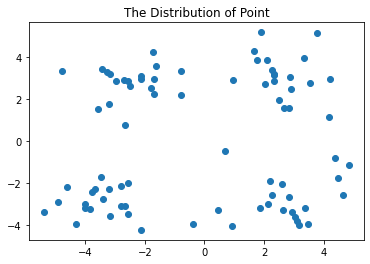

In [4]:
# 예제 데이터셋 시각화
plt.title("The Distribution of Point")
plt.scatter(dataset[:,0],dataset[:,1])
plt.show()

위 산점도를 보면, 예제 데이터에는 크게 4개의 군집이 있음을 직관적으로 파악할 수 있습니다. 각 군집의 대략적인 중심을 잡아보면 아래와 같을 것입니다. 

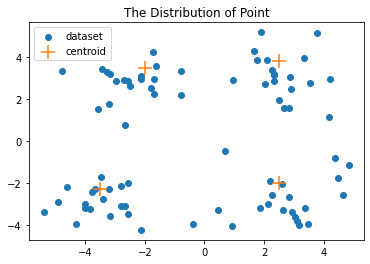

In [5]:
# 예제 데이터셋 시각화
plt.title("The Distribution of Point")
plt.scatter(dataset[:,0],dataset[:,1],label='dataset')
plt.scatter([-3.5,-2,2.5,2.5],[-2.3,3.5,3.8,-2],
            s=200, label="centroid", marker='+')
plt.legend()
plt.show()

위와 같이 군집을 묶어 주기 위해서는 4개의 중심을 잘 잡을 필요가 있습니다. **중심점과 데이터 간의 거리**를 구하고, 그 거리가 가장 작아지는 중심점을 찾도록, 중심점을 반복적으로 옮겨가는 과정을 K-Means 군집화라고 합니다.

---

# \[ 2.Numpy로  K-Means 구현하기 \]

K-means의 알고리즘의 순서는 다음과 같습니다: 

1. 초기 중심점을 설정하기 위해 K개의 점 임의 생성
2. K개의 중심점과 각 데이터 사이의 거리 계산
3. 각 데이터를 거리가 가장 가까운 군집으로 할당
4. 각 군집 별 점들의 평균을 계산 후, 군집의 중심점을 다시 계산
5. 2~4의 과정을 통해 각 데이터 별 군집이 바뀌지 않았으면, 이 과정을 끝냄

각 단계를 Numpy로 구현하는 코드를 작성해본 후, 전체 코드를 합쳐보겠습니다. 

## 1. 각 단계별로 Numpy Code 작성하기

### (1) 초기 중심점을 설정하기 위해 K개의 점 임의 생성

예제 데이터는두 개의 축으로 표현할 수 있는 데이터입니다. K-means 알고리즘은 데이터 공간에서 임의의 점 K개(여기선 4개)를 랜덤하게 산출하는 데서 시작됩니다. 임의로 산출한다고 하지만, 임의의 중심점 4개는 데이터 셋 부근에 있어야 합니다. 따라서 데이터셋의 범위를 파악하고 그 안에서 임의의 값을 뽑아 점 4개를 생성해보겠습니다.

Numpy의 `np.random`을 이용하면 데이터의 최소 최대값 범위 안에서 지정한 확률 분포에 따라 임의의 값을 추출할 수 있습니다. 
예를 들어 위 데이터셋에서 `axis=0`축 데이터의 범위 안의 수를 동일한 확률로 뽑고 싶다면, 확률 분포를 연속균등분포(`uniform`)으로 설정하고 샘플링을 하면 됩니다. 

위와 같은 방법으로 `axis=0`축과 `axis=1`축 각각 범위 내 랜덤한 값 K개를 산출합니다.   
`numpy.uniform` function을 사용합니다. 

In [9]:
center_x = ## fix me ## 
center_y = ## fix me ## 
centroids = np.stack([center_x,center_y],axis=-1)

위와 같이 랜덤으로 산출한 중심점은 아래와 같이 산재해 있습니다.  
(⚠️ centroid 값이 랜덤이기 때문에 아래와 같은 그림이 나오지 않아도 괜찮습니다!)

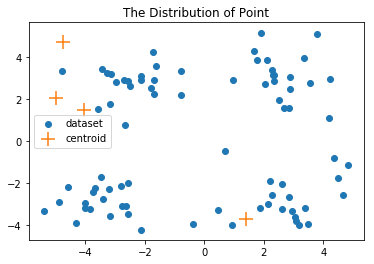

In [11]:
# 예제 데이터셋 시각화

plt.title("The Distribution of Point")
plt.scatter(dataset[:,0],dataset[:,1],label='dataset')
plt.scatter(centroids[:,0],centroids[:,1],
            s=200, label="centroid", marker='+')
plt.legend()
plt.show()

### (2) 중심점과 각 데이터 사이의 거리를 계산

거리 공식은 KNN 때와 마찬가지로, 아래와 같습니다. 우리는 모든 중심점과 각 데이터 간 거리를 구해야 합니다.  
**Numpy Code의 reshape와 broadcasting을 활용하면 간결하게 나타낼 수 있습니다.** 

$$
point1 = (x_1,y_1), point2 = (x_2,y_2)\mbox{일 때}\\
distance\_between\_point1\_and\_point2 = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
$$

In [6]:
## numpy broadcasting 을 활용해 코드 한줄로 모든 centroids 와 모든 데이터간 거리를 계산하세요. 
dists = ## fix me ## 

SyntaxError: invalid syntax (<ipython-input-6-bb28c82694d4>, line 1)

In [13]:
dists.shape # dists 행렬의 형태

(4, 80)

### (3) 각 데이터를 거리가 가장 가까운 군집으로 할당

각 데이터를 거리가 가장 가까운 군집으로 할당 하기 위해서는, `np.argmin`을 통해 간단히 구할 수 있습니다.

In [16]:
cluster_per_point = ## fix me ## 

array([0, 2, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 2, 0, 3, 0, 0, 0, 3, 3,
       0, 0, 3, 0, 3, 2, 3, 0, 2, 1, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], dtype=int64)

각 점에서 가장 가까운 중심점의 index를 위와 같은 방식으로 산출할 수 있습니다.


### (4) 각 군집 별 점들의 평균을 계산 후, 군집의 중심점을 다시 계산
```
X = [3, 4, 5, 6]
cluster_index = [1, 1, 0 ,0]

각 군집에 해당하는 데이터들을 가져온 후 평균을 수행합니다. 
cluster_index 가 1 인 데이터만 가져와 평균을 수행 
(3 + 4) / 2

cluster_index 가 0 인 데이터만 가져와 평균을 수행 
(5 + 6) / 2
```



In [17]:
# 각 군집별로 순회
for i in range(k):
    
    # 각 군집에 해당하는 데이터들을 가져옵니다. 
    target_point = ## fix me ## 
    
    # 각 군집의 평균을 계산해 centroids 에 할당 합니다. 
    centroids[i] = ## fix me ##

### (5) 2~4의 과정을 통해 각 데이터 별 군집이 바뀌지 않았으면, 이 과정을 끝냄
 - 해당 과정은 위에서 작성해 놓은 코드를 활용해야 합니다. 

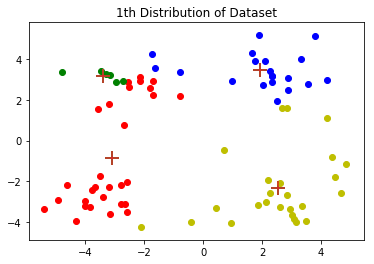

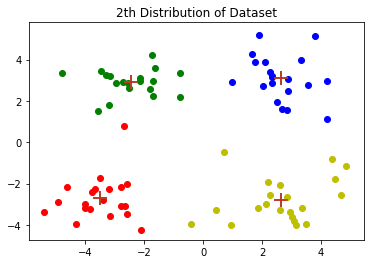

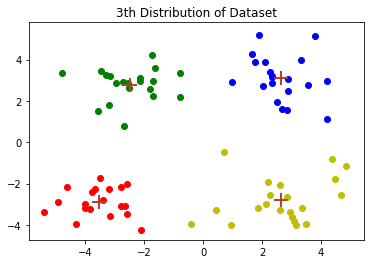

In [18]:
num_data = dataset.shape[0]

cluster_per_point = np.ones((num_data))

counter = 0
while True:
    prev_cluster_per_point = cluster_per_point
    
    # (2) 중심점과 각 데이터 사이의 거리를 계산
    ## fix me ##
    
    # (3) 각 데이터를 거리가 가장 가까운 군집으로 할당
    ## fix me ##

    # (4) 각 군집 별 점들의 평균을 계산 후, 군집의 중심점을 다시 계산
    ## fix me ##            
    
    ## (5) cluster 값이 변하지 않으면 while 구문을 종료(np.all 구문 사용)
    if ## fix me##:
        break
        
    # 시각화 코드 
    counter += 1
    plt.title("{}th Distribution of Dataset".format(counter))
    for idx, color in enumerate(['r','g','b','y']):
        mask = (cluster_per_point==idx)
        plt.scatter(dataset[mask,0],dataset[mask,1],
                    label='dataset', c=color)
        plt.scatter(centroids[:,0],centroids[:,1],
                    s=200, label="centroid", marker='+')
    plt.show()

## 2. 전체 Numpy Code 작성하기
 - 위에서 작성한 코드를 하나로 묶어 function 으로 생성합니다. 

In [19]:
def cluster_kmeans(dataset, k):    
    ## fix ## 
    return centroids

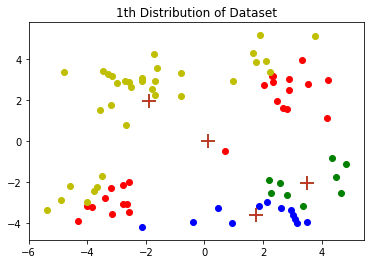

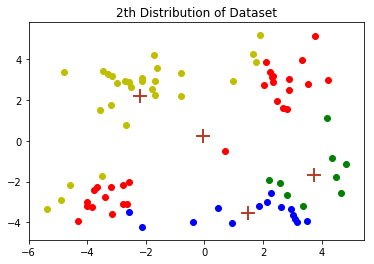

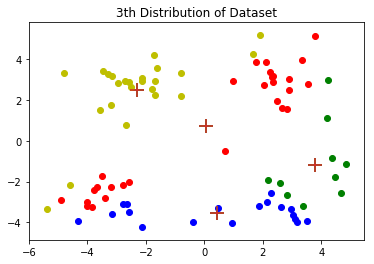

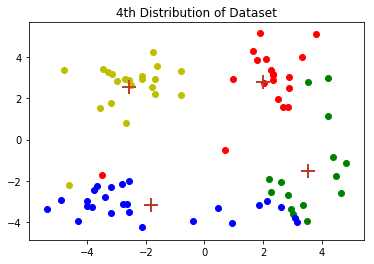

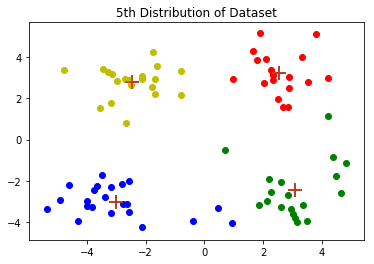

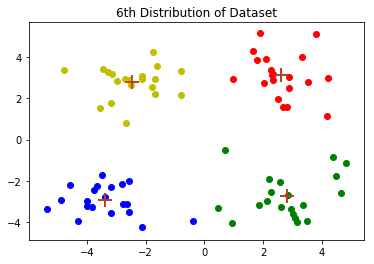

array([[ 2.6265299 ,  3.10868015],
       [ 2.80293085, -2.7315146 ],
       [-3.38237045, -2.9473363 ],
       [-2.46154315,  2.78737555]])

In [20]:
cluster_kmeans(dataset,4)

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI (info@publicai.co.kr)  last updated on 2019/03/04

---